# TWISTTER US AIRLINE SENTIMENT ANALYSIS

In this project, I decided to analyze sentiment of us airline with 10 steps:
> 1. High-level overview 
> 2. Description of Input Data
> 3. Strategy for solving problem and Disscussion the expected solution
> 4. Metrics with justification
> 5. Data Preprocessing
> 6. EDA
> 7. Modeling and Hyperparameter tuning 
> 8. Results and Comparision table
> 9. Conclusion
> 10. Improvement

### High-level overview 

Customer reviews play an important role in the service improvement process of airlines. Analyzing customer reviews will help airlines identify service problems they are facing to improve in the future.

Twitter data has been collected since February 2015, and contributors were asked to first categorize tweets as positive, negative, and neutral, and then to categorize negative reasons (such as “ incoming flight” or “service failure”).

From this dataset, I want to analyze what people review about a particular service and why they are giving those reviews, as well as use Machine Learning to classify whether the review is positive, negative or neutral.

###  Import Required Libraries

In [15]:
import pandas as pd 
import numpy as np 
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
nltk.download(['stopwords','punkt','wordnet', 'omw-1.4'])
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Discription of Input Data

In [16]:
#Export dataset using pandas
df = pd.read_csv('D:\\Udacity\\Twitter_US_Airline_Sentiment\\data\\Tweets.csv')

#Show first 5 rows of dataset
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [17]:
#Show all types of features in the dataset
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [18]:
#Show the shape of dataset
df.shape

(14640, 15)

### Strategy for solving problem and Disscussion the expected solution

We use two ways to encode text:
> - Count Vectorizer
> - TF-IDF


After encoding text, we use two model to classify reviews and compare:
> - Logistic Regression
> - Naive Bayes

### Metrics with justification

Metrics to optimize the model I choose is the accuracy of the whole test set.
To improve the model in the future, knowing that the model is classifying well and not well with which classes, I can show more accuracy, precision, recall, f-1 score of each class and confusion matrix.

#### Data Preprocessing

In [19]:
# List of stop words in English
enstopwords = stopwords.words("english") 

# Columns text with no airline tag only keep characters @ a-z A-Z 
df['text_with_no_airline_tag'] = df['text'].apply(lambda str: re.sub('[^@a-zA-Z]',' ',str))
    
# Remove airline tag like @united from the string
df['text_with_no_airline_tag'] = df['text_with_no_airline_tag'].apply(lambda str: re.sub('@[a-zA-Z]+',' ',str))

# Define list of columns to remove stop words and convert to lowercase
cols = ['airline', 'text_with_no_airline_tag', 'text']

# Remove stop words and convert to lowercase
for col in cols: 
    df[col].apply(lambda str: str.lower())
    df[col].apply(lambda str: [word for word in str.split() if not word in enstopwords])

# Join list of words with space 
df['text'].apply(lambda str: ' '.join(str))
df['text_with_no_airline_tag'].apply(lambda str: ' '.join(str))

# Join list of words with '' 
df['airline'].apply(lambda str: ''.join(str))

# Lemmatize text in 3 columns: airline, text with no airline tag, text
for col in cols: 
    # Tokenize text in to list of words
    df[col].apply(lambda str: word_tokenize(str))
    # Lemmatize each word in list 
    df[col].apply(lambda words: [WordNetLemmatizer().lemmatize(w) for w in words])
    # Join text to return a string
    df[col].apply(lambda lemmed: ' '.join(lemmed))

# Convert label value from string to numeric
map_label_dict = {'positive':1, 'negative':-1, 'neutral':0}
df = df.replace({'airline_sentiment':map_label_dict})

# Filter only 4 columns 
df = df[['airline', 'text_with_no_airline_tag', 'text', 'airline_sentiment']]

### EDA

#### Question 1: Which airline has the best and worst reviews?

In [20]:
# Caculate percentage of positive, negative and neutral reviews of each airlines
df['count'] = 1
dfVis = df.groupby(['airline', 'airline_sentiment']).sum().reset_index()
tmp = dfVis.groupby(['airline'])['airline', 'count'].sum()
dfVis = dfVis.merge(tmp,how = 'left', on = 'airline')
dfVis['per'] = dfVis['count_x']/dfVis['count_y']
dfVis = dfVis[['airline', 'airline_sentiment', 'per', 'count_x']]
dfVis['airline_sentiment'].replace({-1:'negative', 0:'neutral', 1:'positive'}, inplace = True)
dfVis.head()


c:\Users\ACER\anaconda3\envs\tweets\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,airline,airline_sentiment,per,count_x
0,American,negative,0.710402,1960
1,American,neutral,0.167814,463
2,American,positive,0.121783,336
3,Delta,negative,0.429793,955
4,Delta,neutral,0.325383,723


From the dataset, we can plot 2 graphs to show the percentage and number of positive, negative and neutral reviews for each airline.

In [21]:
#Plot percentage of positive, negative and neutral reviews of each airlines
fig = px.bar(dfVis, x='airline', y='per', color='airline_sentiment')
fig.show()

In [22]:
#Plot number of positive, negative and neutral reviews of each airlines
fig = px.bar(dfVis, x='airline', y='count_x', color='airline_sentiment')
fig.show()

We can see that in 3 types of reviews, negative reviews account for the largest proportion and in 6 airlines, American Airlines, United Airlines and Us Airways have a higher negative contribution rate than the remaining 3 airlines.

Although the total number of reviews of Delta Airline, Southwest Airlines, Virgin America is less than the other 3 airlines, they account for a higher percentage of positive reviews.

#### Question 2: What is the cause of negative reviews?

To clarify this issue, we plot 1-gram, 2-gram and 3-gram charts of the text that customers review after going through the data cleaning steps.

In [23]:
def ngrams(n, title, lis_type):
    """
    A Function to plot most common ngrams

    Input: ngram want to show, title of the chart and a list containing 3 lists of object: negative, posivte, neutral 

    Output: a graph of top 15 tokens ngrams appeared the most
    """

    fig, axes = plt.subplots(1, 3, figsize=(18, 8))
    axes = axes.flatten()
    for i, j in zip(lis_type, axes):

        new = i.str.split()
        new = new.values.tolist()
        corpus = [word for i in new for word in i]

        def _get_top_ngram(corpus, n=None):
            #getting top ngrams
            vec = CountVectorizer(ngram_range=(n, n),
                                  max_df=0.9,
                                  stop_words='english').fit(corpus)
            bag_of_words = vec.transform(corpus)
            sum_words = bag_of_words.sum(axis=0)
            words_freq = [(word, sum_words[0, idx])
                          for word, idx in vec.vocabulary_.items()]
            words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
            return words_freq[:15]

        top_n_bigrams = _get_top_ngram(i, n)[:15]
        x, y = map(list, zip(*top_n_bigrams))
        sns.barplot(x=y, y=x, palette='rocket', ax=j)
        
        axes[0].set_title('Positive')
        axes[1].set_title('Negative')
        axes[2].set_title('Neutral')
        axes[0].set_xlabel('Count')
        axes[0].set_ylabel('Word')
        axes[1].set_xlabel('Count')
        axes[1].set_ylabel('Word')
        axes[2].set_xlabel('Count')
        axes[2].set_ylabel('Word')
        fig.suptitle(title, fontsize=24, va='baseline')
        plt.tight_layout()

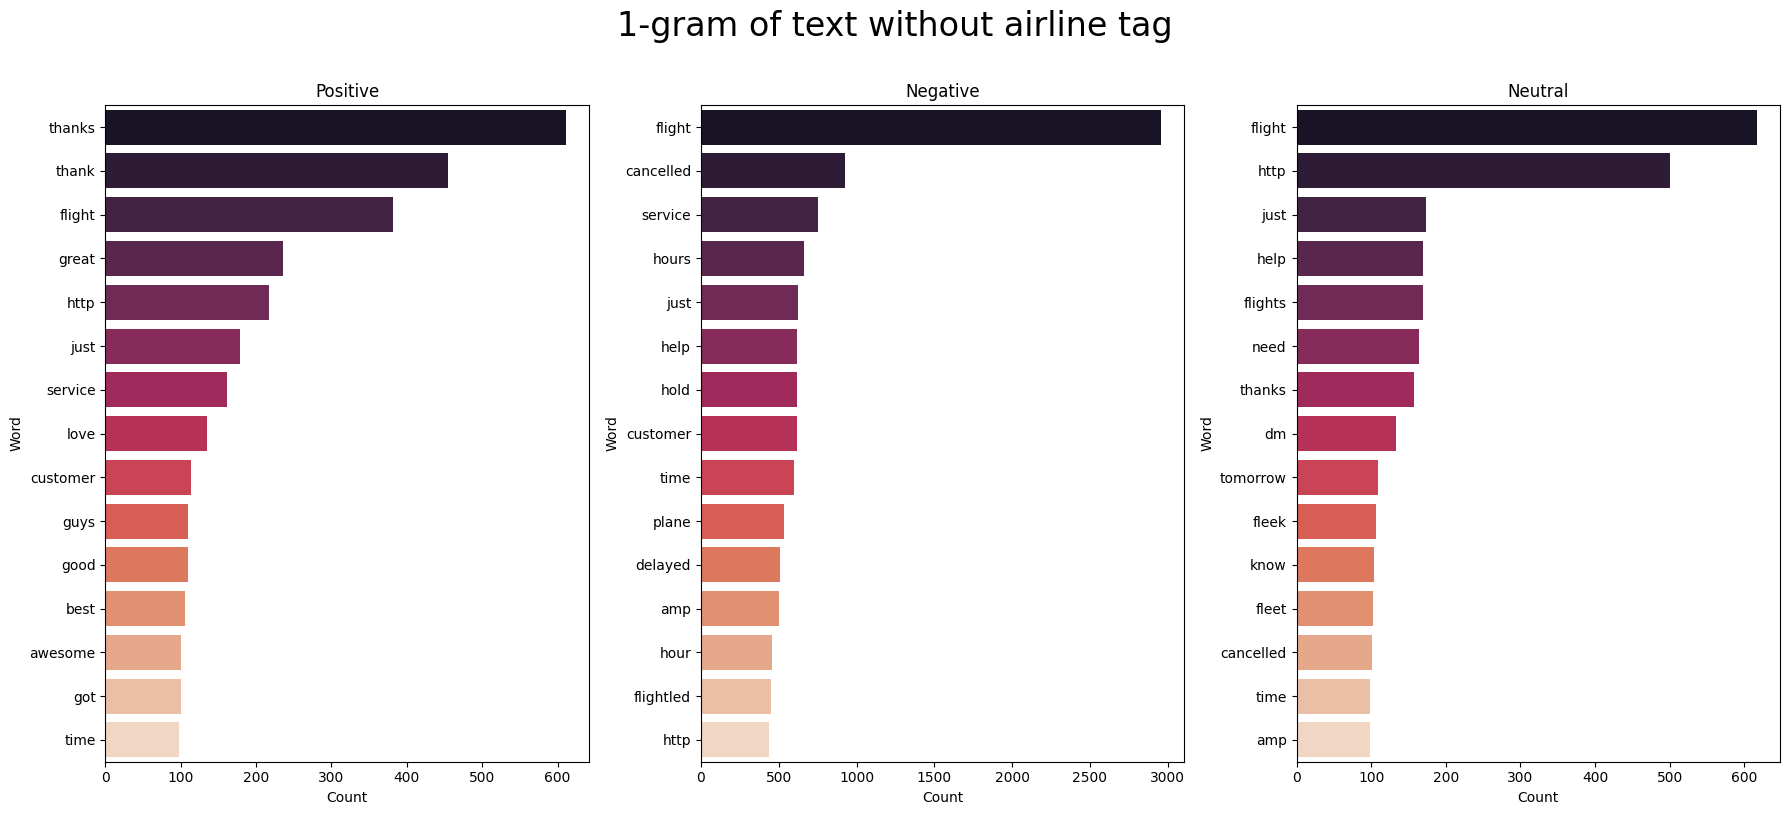

In [24]:
# 1-gram of text with no airline hastag
lis_text_with_no_airline_tag = [
    df[df['airline_sentiment'] == 1]['text_with_no_airline_tag'],
    df[df['airline_sentiment'] == -1]['text_with_no_airline_tag'],
    df[df['airline_sentiment'] == 0]['text_with_no_airline_tag']
]
ngrams(1, "1-gram of text without airline tag", lis_text_with_no_airlinehastag)

Based on the above table, we can see that the words 'thank', 'great', 'customer', 'service' appear most in the positive review class. The words 'canceled', 'service', and 'hour' appear in the negative reviews class. So I guess the customer reviews are about the service of the airlines and the reason for the negative reviews are flight cancellations and flight delays.
For more certainty and information, see the 2-gram and 3-gram charts below.

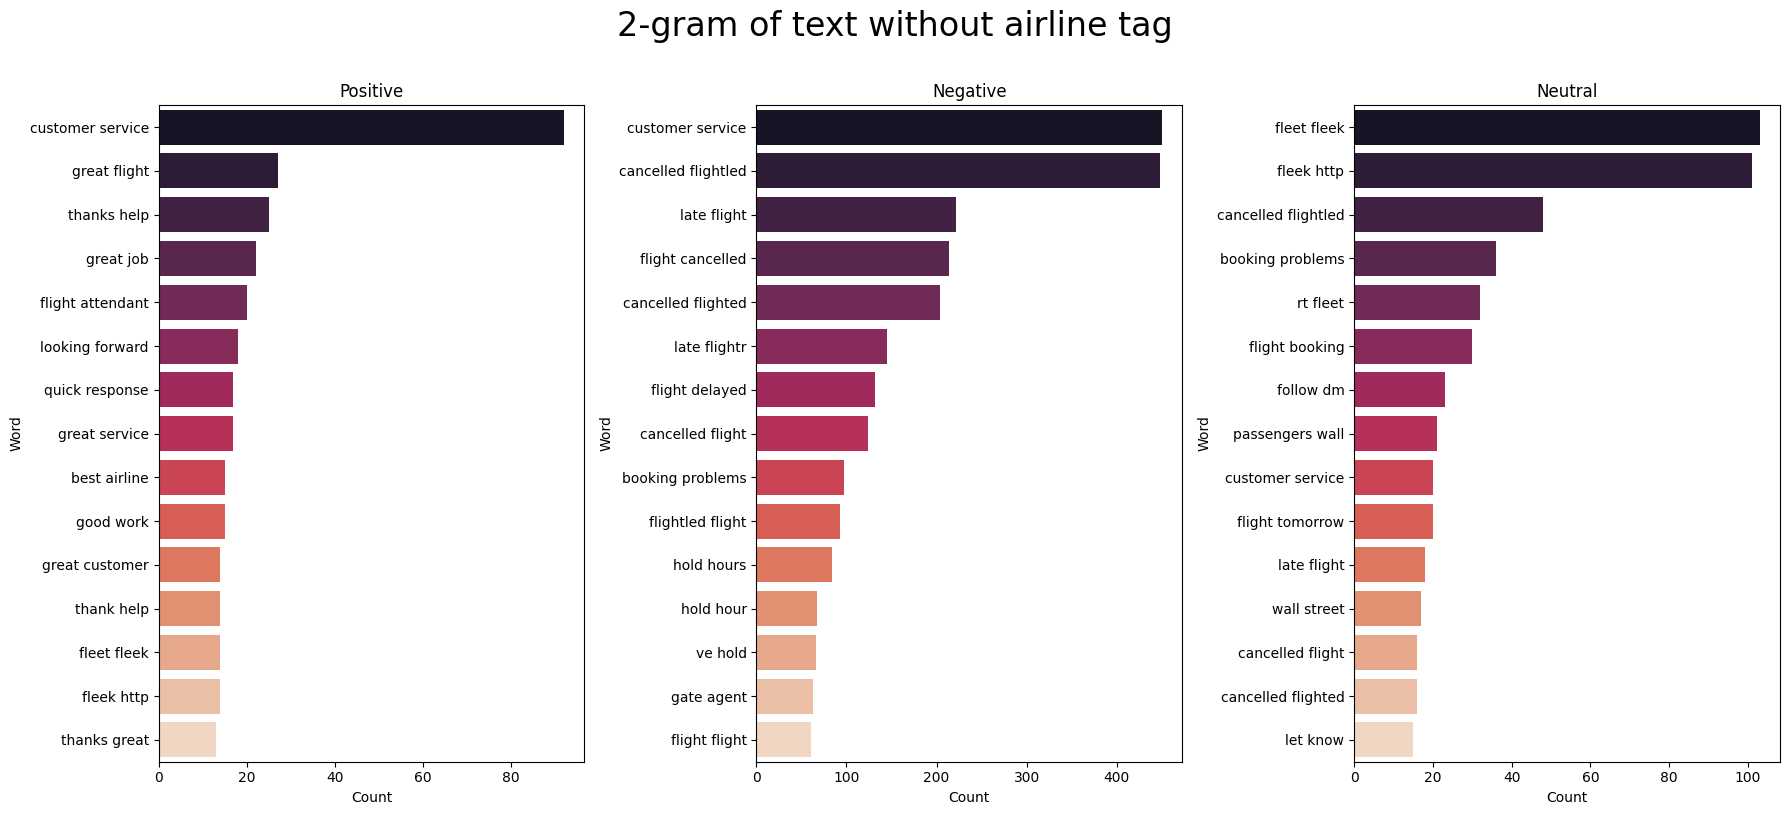

In [25]:
ngrams(2, "2-gram of text without airline tag", lis_text_with_no_airline_tag)

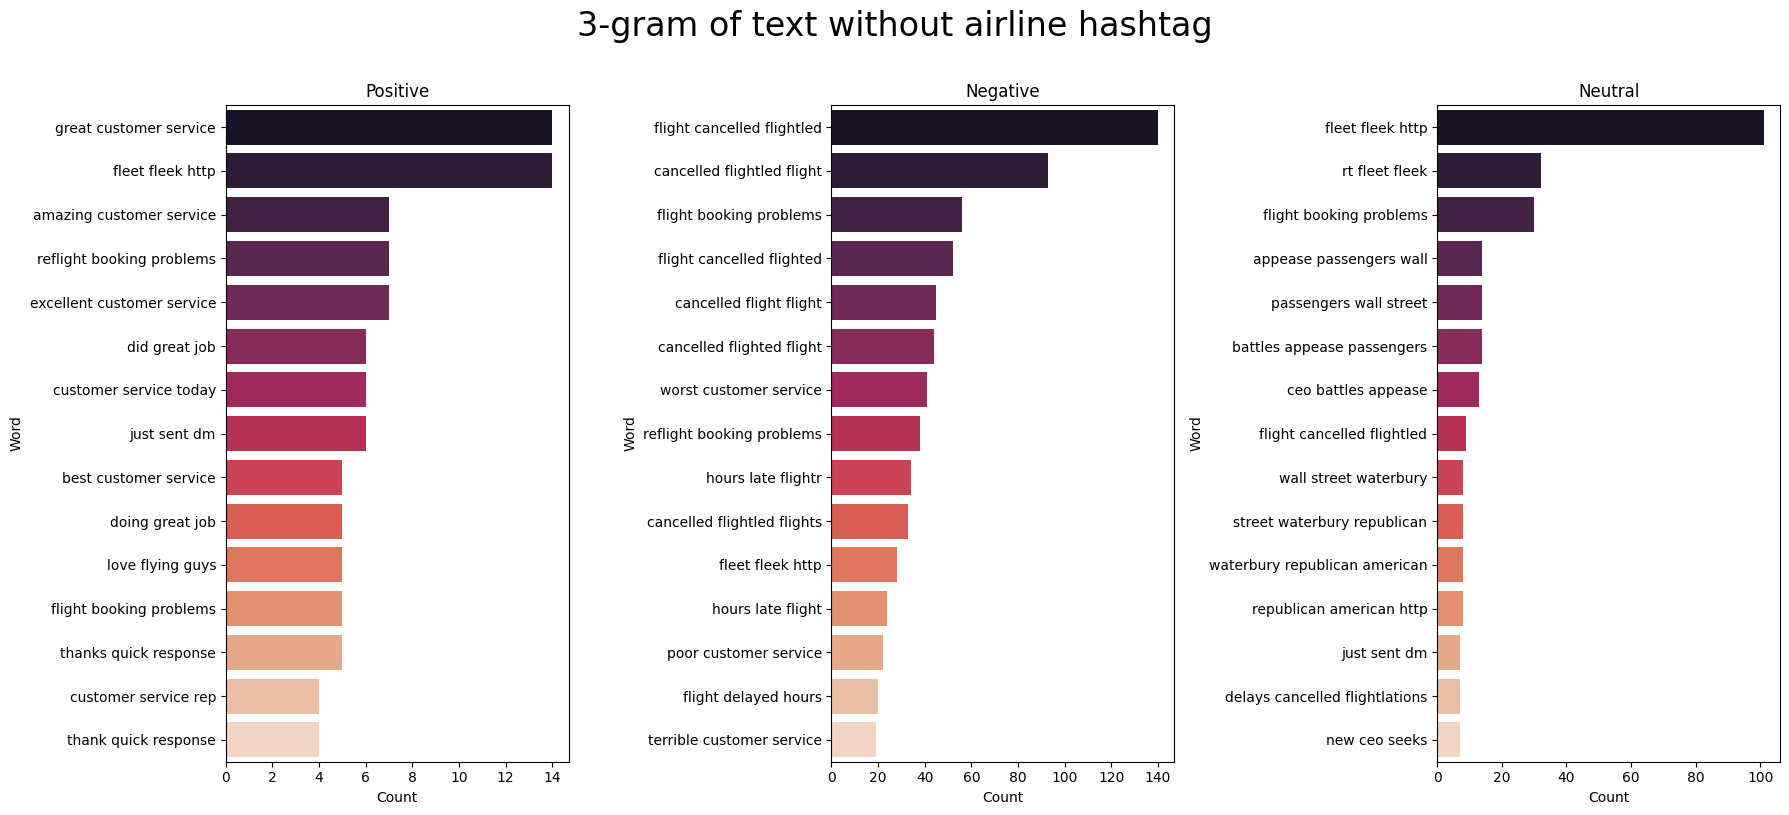

In [26]:
ngrams(3, "3-gram of text without airline hashtag", lis_text_with_no_airline_tag)

Looking at the 2-gram and 3-gram charts, we can confirm that people complain about airline service because of flight delays, cancellations and booking problems.

### Modeling

#### Train-test-split

In [27]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], df['airline_sentiment'], test_size=0.20, random_state=42)

#### Transform text to vector
##### Count vectorizer

In [28]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer() 
# Fit and transform the training data.
count_train = count_vectorizer.fit_transform(X_train)
# Transform the test set 
count_test = count_vectorizer.transform(X_test)

##### TF-IDF

In [29]:
#Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer()
#Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
#Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

##### Logistic Regression

We tune hyperparameter 'C' using grid search and it returns 'C' ​​equal to 1 for both ways of encoding text.

In [30]:
#Train Logistic Regression with grid search
lr = LogisticRegression(max_iter=500)

#Grid search to find the best hyperparameters (c_values)
def gc(model, X, y):
    c_values = [100, 10, 1.0, 0.1, 0.01]
    grid = dict(C=c_values)
    grid_search = GridSearchCV(estimator=model, param_grid=grid)
    grid_search.fit(X, y)
    return grid_search, grid_search.best_params_

model1_bow, best1 = gc(lr, count_train, Y_train)#Fit model with countvectorizer input vectors
model1_tfidf, best2 = gc(lr, tfidf_train, Y_train)#Fit model with tfidf input vectors

c:\Users\ACER\anaconda3\envs\tweets\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\ACER\anaconda3\envs\tweets\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\ACER\anacon

In [31]:
best1, best2 #Print best C_values of countvectorizer and tfidf

({'C': 0.1}, {'C': 1.0})

##### Naive Bayes

We tune hyperparameter alpha and it returns alpha ​​equal to 0.65 with Count Vectorizer and 0.1 for TF-IDF.

In [32]:
# tune the hyperparameter  alpha for of count vectorizer input
for alpha in np.arange(0,1,.05):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(count_train, Y_train)
    pred_tune = nb_classifier_tune.predict(count_test)
    score = accuracy_score(Y_test, pred_tune)
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.75546
Alpha: 0.05 Score: 0.78723
Alpha: 0.10 Score: 0.79303
Alpha: 0.15 Score: 0.79542
Alpha: 0.20 Score: 0.79713
Alpha: 0.25 Score: 0.79474
Alpha: 0.30 Score: 0.79508
Alpha: 0.35 Score: 0.79372
Alpha: 0.40 Score: 0.79406
Alpha: 0.45 Score: 0.79269
Alpha: 0.50 Score: 0.79474
Alpha: 0.55 Score: 0.79542
Alpha: 0.60 Score: 0.79645
Alpha: 0.65 Score: 0.79747
Alpha: 0.70 Score: 0.79816
Alpha: 0.75 Score: 0.79611
Alpha: 0.80 Score: 0.79406
Alpha: 0.85 Score: 0.79098
Alpha: 0.90 Score: 0.78928
Alpha: 0.95 Score: 0.78723


c:\Users\ACER\anaconda3\envs\tweets\lib\site-packages\sklearn\naive_bayes.py:557: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



In [33]:
# Tune the hyperparameter  alpha for of tfidf input
for alpha in np.arange(0,1,.05):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(tfidf_train, Y_train)
    pred_tune = nb_classifier_tune.predict(tfidf_test)
    score = accuracy_score(Y_test, pred_tune)
    print("Alpha: {:.2f}  Score: {:.5f}".format(alpha, score))

Alpha: 0.00  Score: 0.74693
Alpha: 0.05  Score: 0.76400
Alpha: 0.10  Score: 0.76264
Alpha: 0.15  Score: 0.75581
Alpha: 0.20  Score: 0.75376
Alpha: 0.25  Score: 0.74966
Alpha: 0.30  Score: 0.74385
Alpha: 0.35  Score: 0.73805
Alpha: 0.40  Score: 0.73224
Alpha: 0.45  Score: 0.72541
Alpha: 0.50  Score: 0.72097
Alpha: 0.55  Score: 0.71790
Alpha: 0.60  Score: 0.71482
Alpha: 0.65  Score: 0.70936
Alpha: 0.70  Score: 0.70560
Alpha: 0.75  Score: 0.70287
Alpha: 0.80  Score: 0.70048
Alpha: 0.85  Score: 0.69843
Alpha: 0.90  Score: 0.69399
Alpha: 0.95  Score: 0.69023


c:\Users\ACER\anaconda3\envs\tweets\lib\site-packages\sklearn\naive_bayes.py:557: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



In [34]:
model2_bow = MultinomialNB(alpha = 0.65)
model2_tfidf = MultinomialNB(alpha = 0.10)

model2_bow.fit(count_train, Y_train) #Fit model with count vectorizer
model2_tfidf.fit(tfidf_train, Y_train)#Fit model with tfidf

MultinomialNB(alpha=0.1)

### Results and Comparision table

In [35]:
""" 
Function that caculate accuracy, confusion matrix and classification report of model
"""
def evaluate(X_train, Y_train, X_test, Y_test, model):
    # Accuracy Score on Training Data
    X_train_prediction = model.predict(X_train)

    model_names = [name for name in globals() if globals()[name] is model]
    print("\n", model_names)

    training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
    print('Accuracy score on the training data: ',training_data_accuracy)

    X_test_prediction = model.predict(X_test)
    # test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    # print classification report
    print("Accuracy score on the test data: ", accuracy_score(Y_test, X_test_prediction))
    print(classification_report(Y_test, X_test_prediction))
    
    plot_confusion_matrix(model, X_test, Y_test)


 ['model1_bow']
Accuracy score on the training data:  0.8649248633879781
Accuracy score on the test data:  0.8022540983606558
              precision    recall  f1-score   support

          -1       0.85      0.91      0.88      1889
           0       0.64      0.57      0.60       580
           1       0.77      0.64      0.70       459

    accuracy                           0.80      2928
   macro avg       0.75      0.71      0.73      2928
weighted avg       0.80      0.80      0.80      2928


 ['model1_tfidf']
Accuracy score on the training data:  0.8820867486338798
Accuracy score on the test data:  0.8039617486338798
              precision    recall  f1-score   support

          -1       0.83      0.94      0.88      1889
           0       0.67      0.52      0.59       580
           1       0.80      0.61      0.70       459

    accuracy                           0.80      2928
   macro avg       0.77      0.69      0.72      2928
weighted avg       0.80      0.80    

c:\Users\ACER\anaconda3\envs\tweets\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

c:\Users\ACER\anaconda3\envs\tweets\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



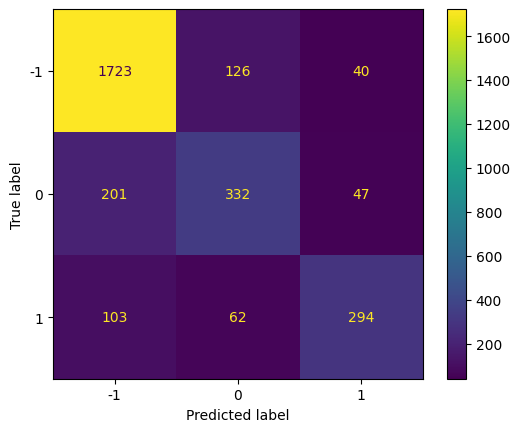

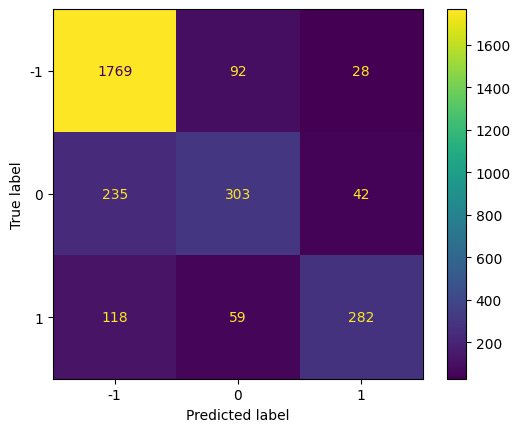

In [36]:
#Print accuracy, confusion matrix and classification report of logistic regression model 
evaluate(count_train, Y_train, count_test, Y_test, model1_bow) # Model of count vectorizer
evaluate(tfidf_train, Y_train, tfidf_test, Y_test, model1_tfidf)# Model of tf idf

Looking at the above results, we can see that the model identified the most wrong in the neutral reviews class and the two models gave approximately equal results in the accuracy of each class. Accuracy of Count Vectorizer is 79% and TF-IDF is 80%.


 ['model2_bow']
Accuracy score on the training data:  0.8701331967213115
Accuracy score on the test data:  0.7974726775956285
              precision    recall  f1-score   support

          -1       0.81      0.95      0.87      1889
           0       0.69      0.44      0.54       580
           1       0.83      0.62      0.71       459

    accuracy                           0.80      2928
   macro avg       0.78      0.67      0.71      2928
weighted avg       0.79      0.80      0.78      2928


 ['_', 'model2_tfidf', '_34']
Accuracy score on the training data:  0.8888319672131147
Accuracy score on the test data:  0.762636612021858
              precision    recall  f1-score   support

          -1       0.76      0.97      0.85      1889
           0       0.68      0.32      0.44       580
           1       0.86      0.47      0.61       459

    accuracy                           0.76      2928
   macro avg       0.77      0.59      0.63      2928
weighted avg       0.76   

c:\Users\ACER\anaconda3\envs\tweets\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

c:\Users\ACER\anaconda3\envs\tweets\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



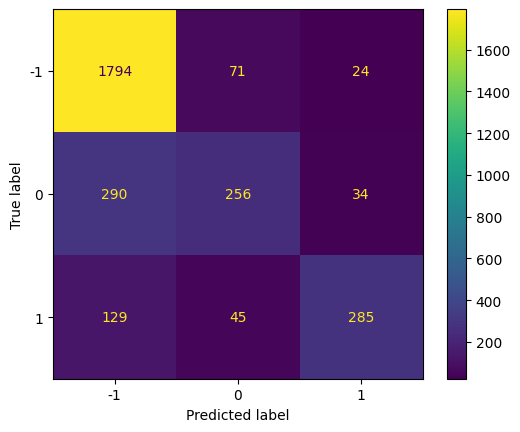

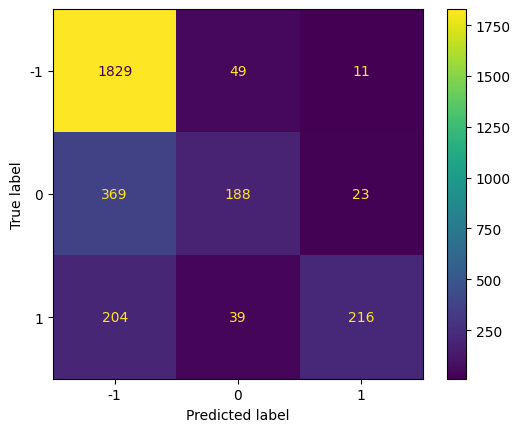

In [37]:
#Print accuracy, confusion matrix and classification report of naive bayes model 
evaluate(count_train, Y_train, count_test, Y_test, model2_bow)#Result of count vectorizer
evaluate(tfidf_train, Y_train, tfidf_test, Y_test, model2_tfidf)#Result of ifidf 

As we can see that the accuracy of neutral class still lower than 2 other class. All the metrics in classification reports are lower than Logistic Regression

### Conclusion

> - Airlines with few reviews often have a higher rate of positive reviews than other airlines and vice versa.
> - Issues with bookings, cancellations and flight delays are the cause of customer complaints.
> - Logistic Regression is better than Naive Bayes in classifying reviews in this data set, and the accuracy of the model when predicting the neutral class is significantly lower than the other two classes.

### Improvement

Since the accuracy of the neutral class is the lowest and lowers the accuracy of the whole set, in the future, I will not only use tf-idf but also create new features to help the model classify the neutral class better based on finding the most characteristic words for the class. neutral and different from the other 2 classes.